In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_wine
# Load Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Display first few rows
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
#dataset has no missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
# K-Means is sensitive to different feature scales, so we use StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
# To visualize clusters in 2D, we reduce dimensions using PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

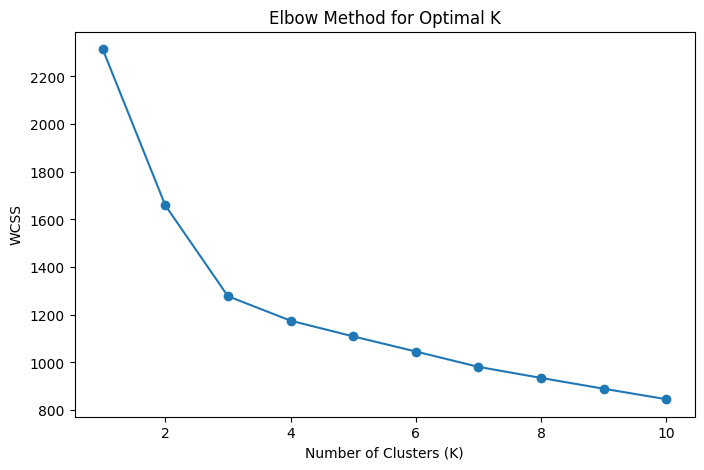

In [13]:
# Determine Optimal K Using the Elbow Method
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# The elbow point helps determine the optimal number of clusters.

In [14]:
# Choosing optimal K (3 based on Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Compute Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.28


In [ ]:
# silhouette Score > 0.5 means the clustering is good.

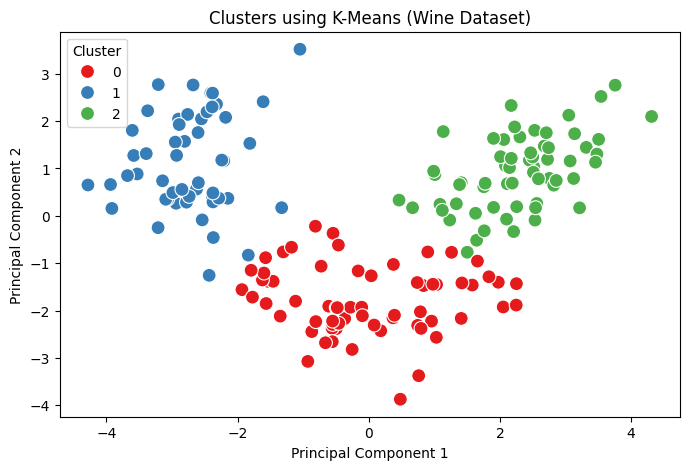

In [15]:
# Scatter plot of clusters after PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'],
                hue=df['Cluster'], palette='Set1', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters using K-Means (Wine Dataset)')
plt.legend(title='Cluster')
plt.show()

In [17]:

from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Compute clustering evaluation metrics
sil_score = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])

print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {sil_score:.3f} (Higher is better)")

# ------------------------- KNN CLASSIFICATION EVALUATION -------------------------
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  # Choosing k=5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compute classification evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("\nK-Nearest Neighbors (KNN) Evaluation:")
print(f"Accuracy: {accuracy:.3f} (Higher is better)")
print(f"Precision: {precision:.3f} (Higher is better)")
print(f"Recall: {recall:.3f} (Higher is better)")
print(f"F1 Score: {f1:.3f} (Higher is better)")
print("Confusion Matrix:\n", cm)


K-Means Clustering Evaluation:
Silhouette Score: 0.285 (Higher is better)

K-Nearest Neighbors (KNN) Evaluation:
Accuracy: 0.722 (Higher is better)
Precision: 0.722 (Higher is better)
Recall: 0.722 (Higher is better)
F1 Score: 0.722 (Higher is better)
Confusion Matrix:
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]
